In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import timeit

In [2]:
# Activation functions
def ReLU(x):
    return x * (x > 0)

def Sig(x):
    return 1/(1+np.exp(-x))

# feed forward function
def ff(x, w, b):
    # First Hidden calculations
    h0 = ReLU(x.dot(w[0])+ b[0])
 
  # Second Hidden calculations
    h1 = ReLU(h0.dot(w[1]) + b[1])

  # output calculations
    ff = Sig(h1.dot(w[2]) + b[2])
    return ff
# geneartion function for random weights abd biases
def random_w(s):
    w0 = (np.random.rand(784, 512) - .5) * s
    w1 = (np.random.rand(512, 512) - .5) * s
    w2 = (np.random.rand(512, 10) - .5) * s
    b0 = (np.random.rand(512, ) - .5) * s
    b1 = (np.random.rand(512, ) - .5) * s
    b2 = (np.random.rand(10, ) - .5) * s
    w = [w0, w1, w2]
    b = [b0, b1, b2]
    return w, b

def onehot(X):
    T = np.zeros((X.shape[0],np.max(X)+1))
    T[np.arange(len(X)),X] = 1 #Set T[i,X[i]] to 1
    return T

In [3]:
# data preprocessing
xtrain = np.loadtxt('xtrain.txt', delimiter=',')
xtrain /= 255
ytrain = np.loadtxt('ytrain.txt', delimiter=',').astype(int)
ytrain = onehot(ytrain)

In [4]:
start = timeit.default_timer()

# setting the best weights and biases
w_best, b_best = random_w(0.2) # creating first random weights and biases
y_plot = [] # save errors in each iteration for later plot
iter = 1200
for i in range (iter):
    
    k = np.random.randint(60000, size=500)
    xtrain_rand = xtrain[k,:]
    ytrain_rand = ytrain[k,]
    
    w_rand, b_rand = random_w(.02)
    w = [w_best[j] + w_rand[j] for j in range(len(w_best))]
    b = [b_best[j] + b_rand[j] for j in range(len(w_best))] 

    from sklearn.metrics import mean_squared_error
    e0 = mean_squared_error(ytrain_rand,ff(xtrain_rand, w_best, b_best))
    e1 = mean_squared_error(ytrain_rand,ff(xtrain_rand, w, b))
    #print(e0)
    #print(e1)
    y_plot.append(e0)  
    
    if e0 > e1:
        w_best = w
        b_best = b
        
        #return W0_best,W1_best,W2_best,B0_best,B1_best,B2_best
stop = timeit.default_timer()
time = print('running time:', round((stop - start ),2), 's')

running time: 89.83 s


In [5]:
# load test datasets
xtest = np.loadtxt('xtest.txt', delimiter=',')
xtest /= 255
ytest = np.loadtxt('ytest.txt', delimiter=',').astype(int)

In [6]:
# test 
Output = ff(xtest, w_best, b_best)
Output = np.argmax(Output, axis = 1)

In [7]:
#ytrain1 = np.loadtxt('ytrain.txt', delimiter=',').astype(int)
accuracy = ((np.count_nonzero(Output==ytest))/10000)*100
print('accuracy:', round(accuracy,2), '%') 

accuracy: 55.17 %


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix        
cm = confusion_matrix(Output, ytest)
print(cm)

[[ 816    1  120   68   35   95   67   50   97   62]
 [   2 1000  126   39   49   32   47  100  213   46]
 [  11   67  198   33   14   62   71   25   40    3]
 [   8   21  122  679   45  104    6   31  147   29]
 [  15    0   49    9  541   63   45   34   60  193]
 [  57    9   34   32   14  357   57   13  128   15]
 [  58    2  294   68  118   56  658    7   69   36]
 [   9   24   48   25   23   87    1  712  123   88]
 [   0    6   15    2    3    7    0    1   22    3]
 [   4    5   26   55  140   29    6   55   75  534]]


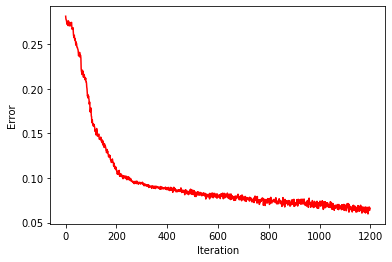

In [9]:
# plot error vs iterations
plt.plot( y_plot, 'r')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()